<a href="https://colab.research.google.com/github/vishwanath103/MIT-DL-Course/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     |████████████████████████████████| 2.1MB 8.3MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp37-none-any.whl size=2115442 sha256=f9b0bd749c969f970fab1e52740bb0ff7bf9c0faaad25481de29f8882d18d809
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


## MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


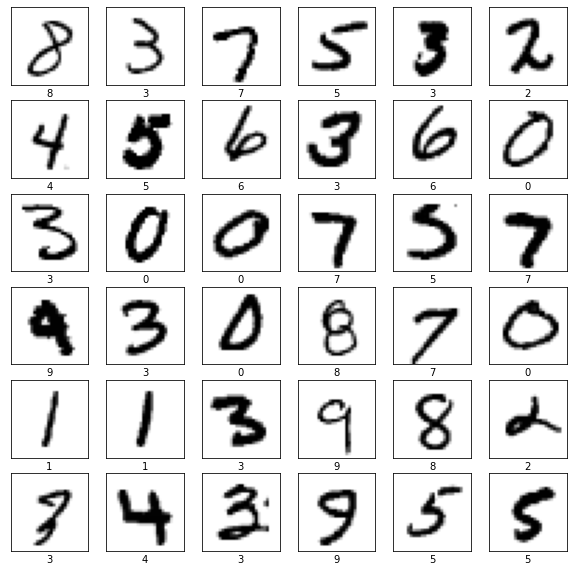

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
            # First define a Flatten layer
            tf.keras.layers.Flatten(),

            # Dense layer with activation function
            tf.keras.layers.Dense(128, activation='relu'),

            # Dense layer for output classification probabilities
            tf.keras.layers.Dense(10, activation='sigmoid')
  ])
  return fc_model

model  = build_fc_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.5675 - accuracy: 0.8447
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2143 - accuracy: 0.9391
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1545 - accuracy: 0.9562
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1268 - accuracy: 0.9649
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1039 - accuracy: 0.9721


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)

print('Test Accuracy: ', test_acc)

157/157 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9680
Test Accuracy:  0.9679999947547913


In [10]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
              # First convolutional layer
              tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

              # First first max pooling layer
              tf.keras.layers.MaxPool2D(pool_size=(2,2)),

              # Second convolutional layer
              tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

              # Secong max pooling layer
              tf.keras.layers.MaxPool2D(pool_size=(2,2)),

              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=tf.nn.relu),

              # Dense layer to output the classification probabilities
              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [11]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [12]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 31s 32ms/step - loss: 0.5660 - accuracy: 0.8181
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0769 - accuracy: 0.9759
Epoch 3/5
938/938 [==============================] - 30s 33ms/step - loss: 0.0527 - accuracy: 0.9834
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0418 - accuracy: 0.9866
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0346 - accuracy: 0.9893


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9680
Test Accuracy:  0.9679999947547913


## Make predictions with the CNN Model

In [16]:
predictions = cnn_model.predict(test_images)

In [17]:
predictions[0]

array([6.2241798e-09, 1.1320858e-07, 6.2901695e-06, 2.6115253e-05,
       7.1914130e-08, 1.4124982e-09, 3.0068442e-13, 9.9996650e-01,
       2.9890387e-07, 6.6878255e-07], dtype=float32)

In [18]:
prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


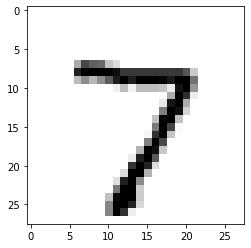

In [19]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

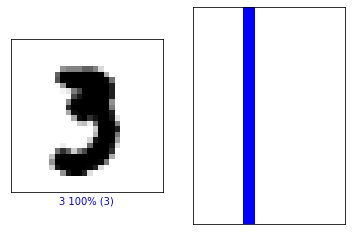

In [27]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 93 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

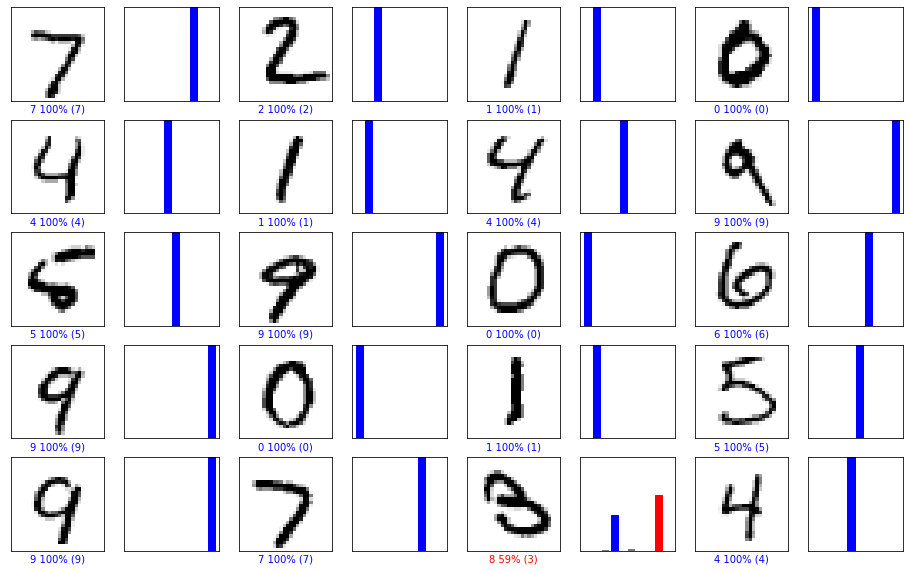

In [28]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)